In [1]:
### Data Scientist Salary Exploratory Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/ds_salaries.csv')

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
# to check if variables are in the correct data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
# to check for missing variables
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

C:\Users\miche\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

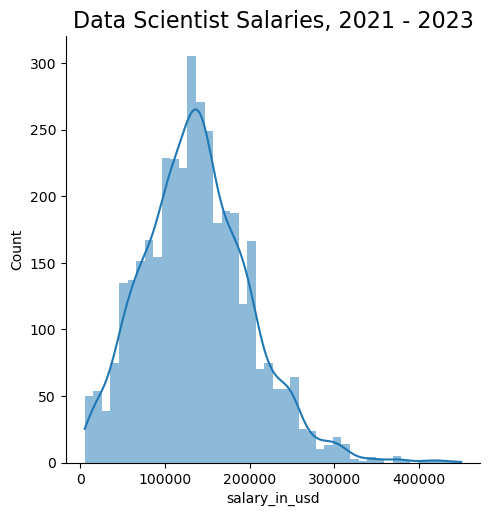

In [7]:
# exploratory data analysis
# to plot a distribution plot of salary_in_usd, it seems like a normal distribution
plt.figure(figsize=(12,8), dpi=100)
sns.displot(data=df, x='salary_in_usd', edgecolor=None, kde=True)
plt.title('Data Scientist Salaries, 2021 - 2023', fontsize=16);

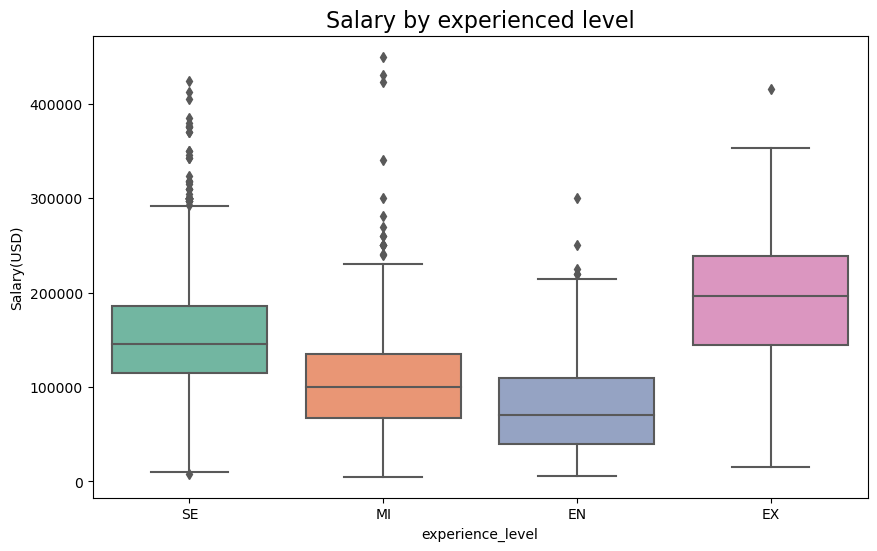

In [13]:
# to plot salary by experience level
# EX, Executive level Data scientists is the most highly-paid
plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='Set2')
plt.title('Salary by experienced level', fontsize=16)
plt.ylabel('Salary(USD)');

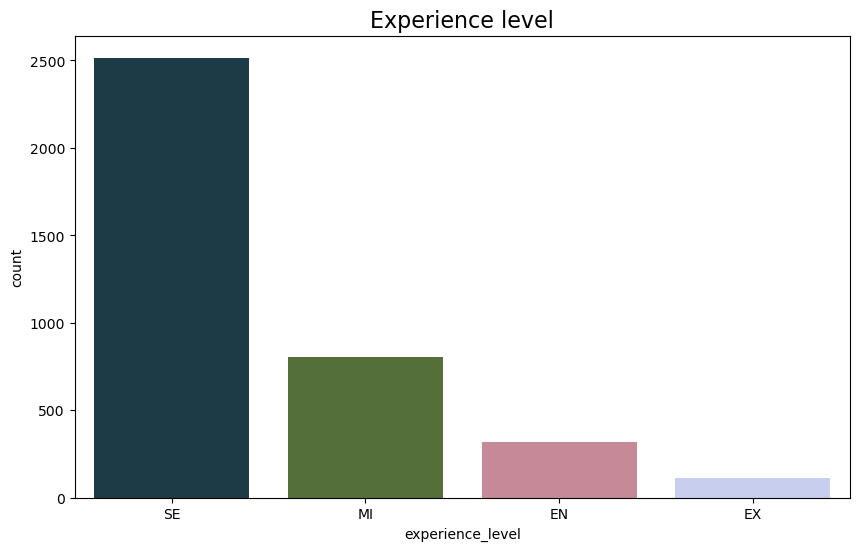

In [53]:
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='experience_level', palette='cubehelix')
plt.title('Experience level', fontsize=16);

In [55]:
# Most people are SE, also stands for Senior Level
pd.DataFrame(df['experience_level'].value_counts())

,count
experience_level,
SE,2516
MI,805
EN,320
EX,114


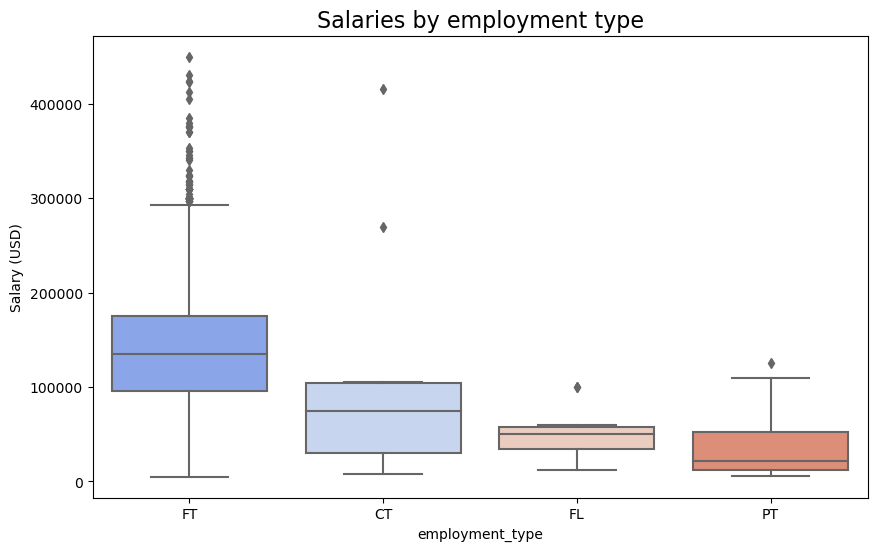

In [17]:
# to plot employement types by salaries
# Full time data Scientists are paid the most
plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(data=df, x='employment_type', y='salary_in_usd', palette='coolwarm')
plt.title('Salaries by employment type', fontsize=16)
plt.ylabel('Salary (USD)');

In [23]:
# 46.86% of DS positions are fully remote, 7.24% of the positions are 50% remote
pd.DataFrame(100*df['remote_ratio'].value_counts()/len(df))

,count
remote_ratio,
100,46.865325
0,45.897833
50,7.236842


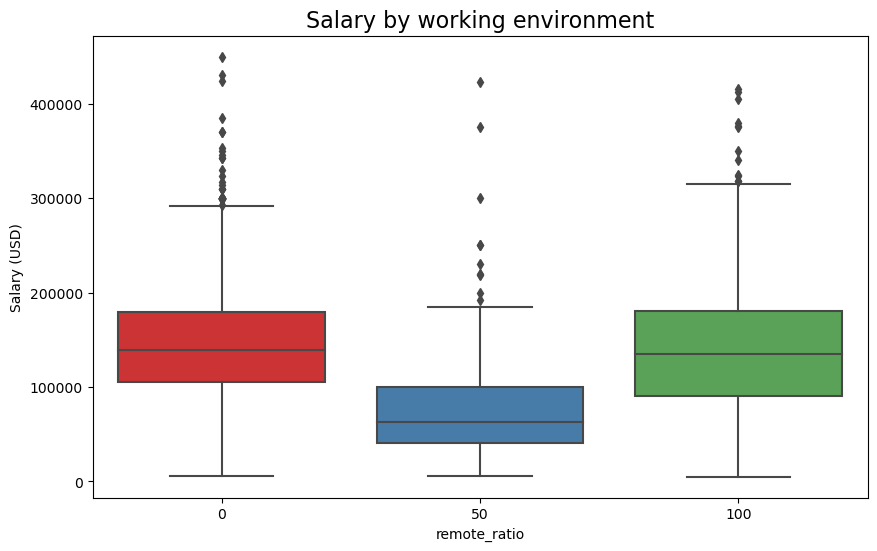

In [23]:
plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd', palette='Set1');
plt.title('Salary by working environment', fontsize=16)
plt.ylabel('Salary (USD)');

In [35]:
# It seems that 100% Remote Data Scientist roles are paid the most
pd.DataFrame(df.groupby(['remote_ratio','salary_in_usd'])['salary_in_usd'].median())

salary_in_usd
remote_ratio salary_in_usd               
0            5882                  5882.0
             6072                  6072.0
             6304                  6304.0
             7000                  7000.0
             9466                  9466.0
...                                   ...
100          376080              376080.0
             380000              380000.0
             405000              405000.0
             412000              412000.0
             416000              416000.0

[1301 rows x 1 columns]

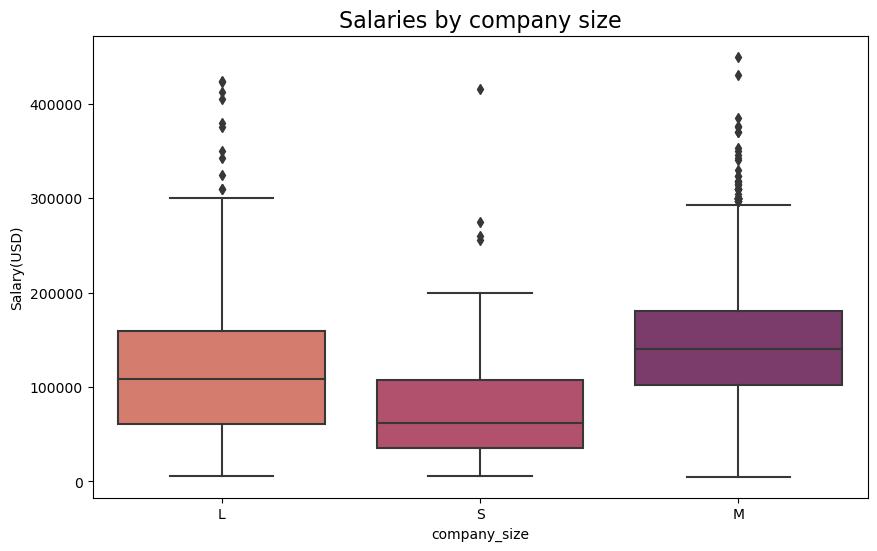

In [49]:
# Positions in Medium size companies are paid the most
plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(data=df, x='company_size', y='salary_in_usd', palette='flare')
plt.title('Salaries by company size', fontsize=16)
plt.ylabel('Salary(USD)');

In [57]:
df['work_year'].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

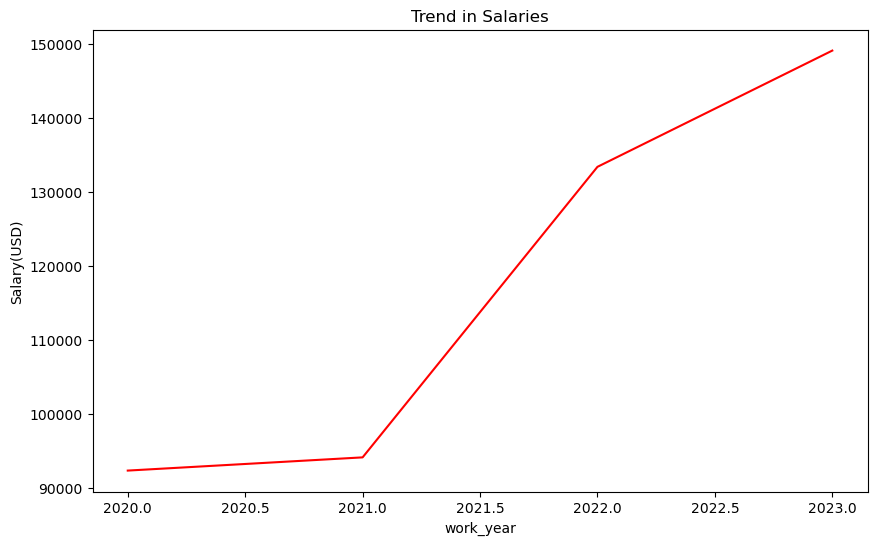

In [63]:
# an upward trend in salaries for Data Scientists is observed
plt.figure(figsize=(10,6), dpi=100)
sns.lineplot(data=df, x='work_year', y='salary_in_usd', errorbar= None, color='red')
plt.title('Trend in Salaries')
plt.ylabel('Salary(USD)');

In [26]:
# to identify top 20 job titles with the highest paid salaries
Top_salaries = df.groupby('job_title')['salary_in_usd'].median().nlargest(20)

In [28]:
Top_salaries = Top_salaries.sort_values(ascending=False)

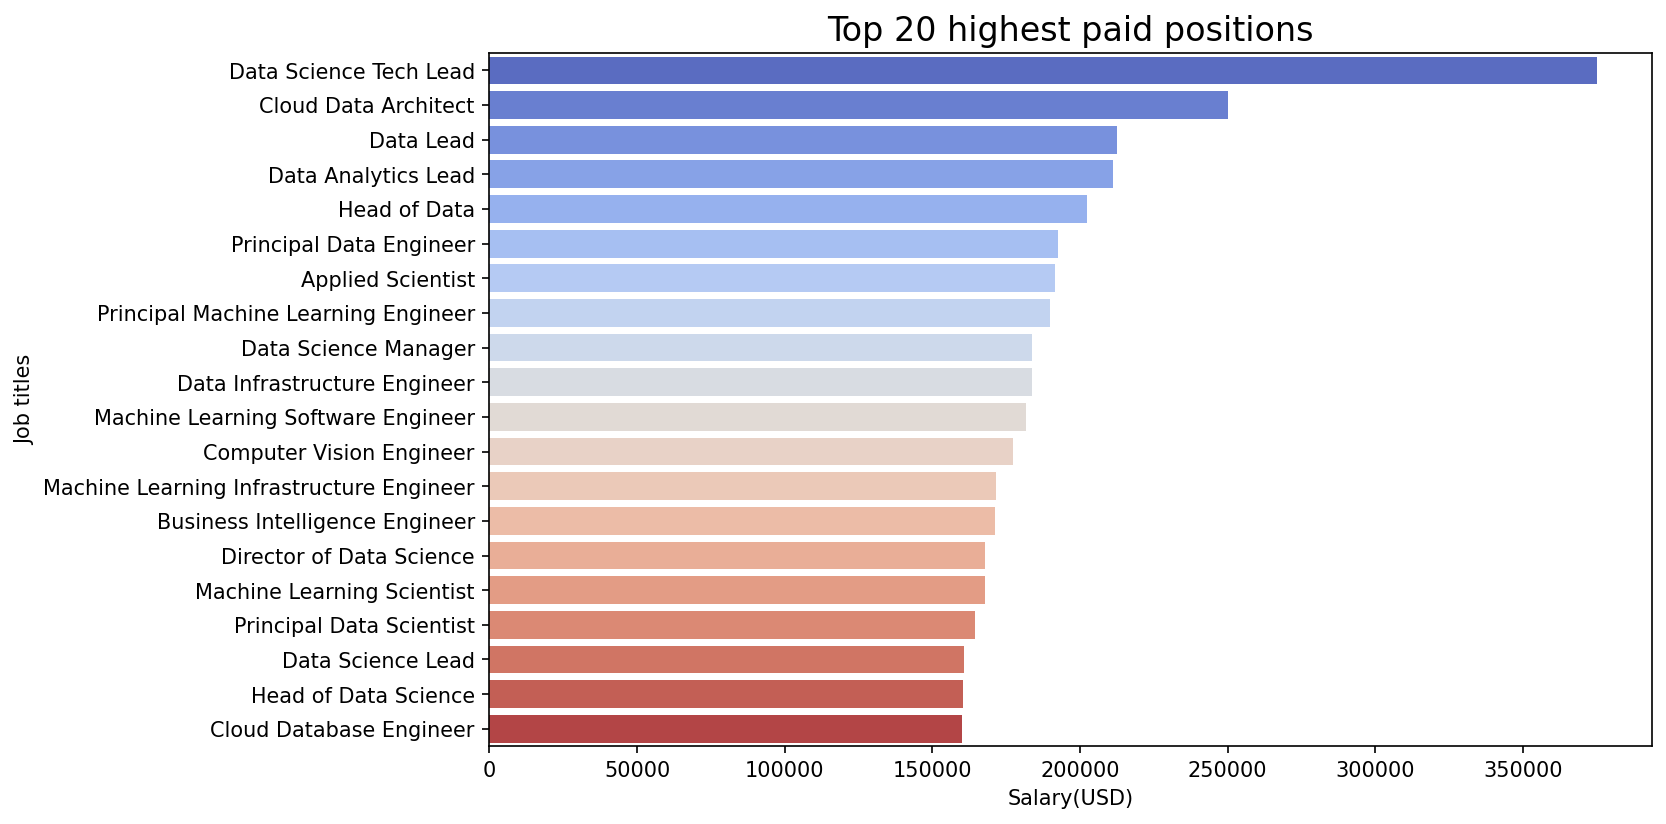

In [64]:
# to plot barplot of top 20 highly paid Data Scientist position
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=Top_salaries.values, y=Top_salaries.index, palette='coolwarm')
plt.title('Top 20 highest paid positions', fontsize=16)
plt.ylabel('Job titles')
plt.xlabel('Salary(USD)');